<a href="https://colab.research.google.com/github/ykato27/Auto-Encorder/blob/main/AutoEncoder_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras AutoEncoder で異常検知をやってみる


In [1]:
# tensolflowバージョン1.x　を選択
%tensorflow_version 1.x

TensorFlow 1.x selected.


Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]


11493376/11490434 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 49500 samples, validate on 10500 samples
Epoch 1/50
49500/49500 [==============================] - 2s 48us/step - loss: 0.3741 - val_loss: 0.2740
Epoch 2/50
49500/49500 [==============================] - 1s 14us/step - loss: 0.2674 - val_loss: 0.2594
Epoch 3/50
49500/49500 [==============================] - 1s 14us/step - loss: 0.2493 - val_loss: 0.2388
Epoch 4/50
49500/49500 [==============================] - 1s 15us/step - loss: 0.2298 - val_loss: 0.2215
Epoch 5/50
49500/49500 [==============================] - 1s 14us/step - loss: 0.2144 - val_loss: 0.2083
Epoch 6/50
49500/49500 [==============================] - 1s 14us/step - loss: 0.2028 - val_loss: 0.1981
Epoch 7/50
49500/49500 [==============================] - 1s 14us/step - loss: 0.1937 - val_loss: 0.1900
Epoch 8/50
49500/49500 [==============================] - 1s 14us/step - loss: 0.1864 - val_loss: 0.1835
Epoch 9/50
49500/49500 [==============================] - 1s 14us/step - loss: 0.1804 - val_loss: 0.1780
Epoc

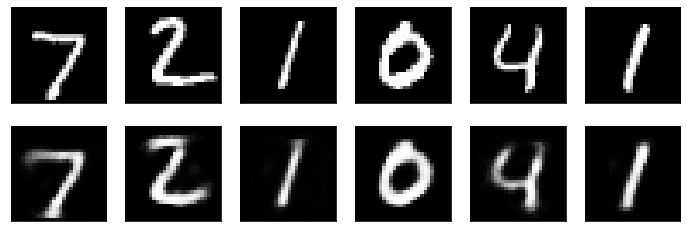

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Input
from keras.models import Model
from sklearn.model_selection import train_test_split

# AutoEncoder ネットワーク構築
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation="relu")(input_img)
decoded = Dense(784, activation="sigmoid")(encoded)
autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")

# MNIST データ読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# データの前準備
x_train, x_valid = train_test_split(x_train, test_size=0.175)
x_train = x_train.astype("float32") / 255.0
x_valid = x_valid.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_valid = x_valid.reshape((len(x_valid), np.prod(x_valid.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# 学習
autoencoder.fit(
    x_train,
    x_train,
    nb_epoch=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_valid, x_valid),
)

# 出力画像の取得
decoded_imgs = autoencoder.predict(x_test)

# サンプル画像表示
n = 6
plt.figure(figsize=(12, 4))
for i in range(n):
    # テスト画像を表示
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 出力画像を表示
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("result.png")
plt.show()

In [3]:
# 学習データを「１」のみにする
x1 = []
for i in range(len(x_train)):
    if y_train[i] == 1:
        x1.append(x_train[i])
x_train = np.array(x1)

# テストデータを「１」と「９」にする
x2, y = [], []
for i in range(len(x_test)):
    if y_test[i] == 1 or y_test[i] == 9:
        x2.append(x_test[i])
        y.append(y_test[i])
x_test = np.array(x2)
y = np.array(y)

Train on 5623 samples, validate on 10500 samples
Epoch 1/300
5623/5623 [==============================] - 0s 28us/step - loss: 0.1074 - val_loss: 0.1079
Epoch 2/300
 256/5623 [>.............................] - ETA: 0s - loss: 0.1027

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


5623/5623 [==============================] - 0s 28us/step - loss: 0.1073 - val_loss: 0.1078
Epoch 3/300
5623/5623 [==============================] - 0s 29us/step - loss: 0.1072 - val_loss: 0.1078
Epoch 4/300
5623/5623 [==============================] - 0s 29us/step - loss: 0.1071 - val_loss: 0.1078
Epoch 5/300
5623/5623 [==============================] - 0s 29us/step - loss: 0.1071 - val_loss: 0.1077
Epoch 6/300
5623/5623 [==============================] - 0s 27us/step - loss: 0.1070 - val_loss: 0.1077
Epoch 7/300
5623/5623 [==============================] - 0s 29us/step - loss: 0.1069 - val_loss: 0.1076
Epoch 8/300
5623/5623 [==============================] - 0s 28us/step - loss: 0.1069 - val_loss: 0.1076
Epoch 9/300
5623/5623 [==============================] - 0s 29us/step - loss: 0.1068 - val_loss: 0.1075
Epoch 10/300
5623/5623 [==============================] - 0s 27us/step - loss: 0.1067 - val_loss: 0.1075
Epoch 11/300
5623/5623 [==============================] - 0s 28us/step - lo

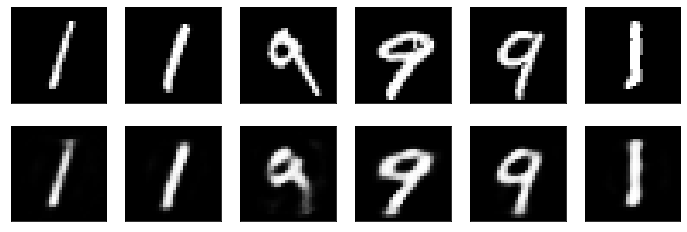

In [4]:
# 学習
autoencoder.fit(
    x_train,
    x_train,
    nb_epoch=300,
    batch_size=256,
    shuffle=True,
    validation_data=(x_valid, x_valid),
)

# 出力画像の取得
decoded_imgs = autoencoder.predict(x_test)

# サンプル画像表示
n = 6
plt.figure(figsize=(12, 4))
for i in range(n):
    # テスト画像を表示
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 出力画像を表示
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig("result.png")
plt.show()

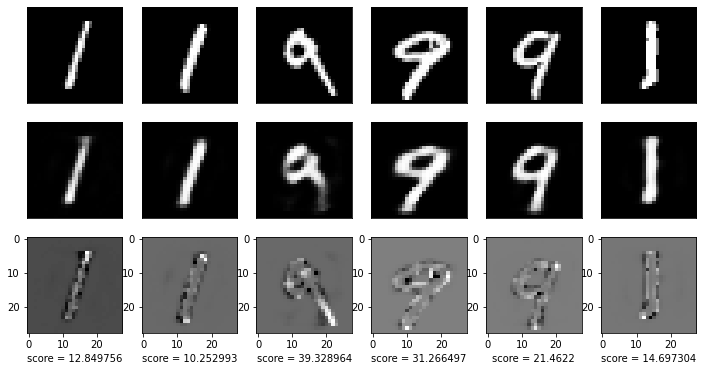

In [5]:
# サンプル画像表示
n = 6
plt.figure(figsize=(12, 6))
for i in range(n):
    # テスト画像を表示
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 出力画像を表示
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 入出力の差分画像を計算
    diff_img = x_test[i] - decoded_imgs[i]

    # 入出力の差分数値を計算
    diff = np.sum(np.abs(x_test[i] - decoded_imgs[i]))

    # 差分画像と差分数値の表示
    ax = plt.subplot(3, n, i + 1 + n * 2)
    plt.imshow(diff_img.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    ax.set_xlabel("score = " + str(diff))

plt.savefig("result.png")
plt.show()
plt.close()

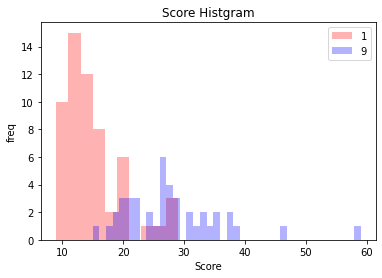

In [6]:
# score を記録したファイルがあれば一端クリア
import os

if os.path.exists("scores_1.txt"):
    os.remove("scores_1.txt")
if os.path.exists("scores_9.txt"):
    os.remove("scores_9.txt")

# score の計算、結果のファイル保存
for i in range(100):
    score = np.sum(np.abs(x_test[i] - decoded_imgs[i]))

    if y[i] == 1:
        with open("scores_1.txt", "a") as f:
            f.write(str(score) + "\n")
    else:
        with open("scores_9.txt", "a") as f:
            f.write(str(score) + "\n")

import csv

# ファイルを元にヒストグラムの表示
import matplotlib.pyplot as plt

x = []
with open("scores_1.txt", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        row = int(float(row[0]))
        x.append(row)
y = []
with open("scores_9.txt", "r") as f:
    reader = csv.reader(f)
    for row in reader:
        row = int(float(row[0]))
        y.append(row)

plt.title("Score Histgram")
plt.xlabel("Score")
plt.ylabel("freq")
plt.hist(x, bins=10, alpha=0.3, histtype="stepfilled", color="r", label="1")
plt.hist(y, bins=40, alpha=0.3, histtype="stepfilled", color="b", label="9")
plt.legend(loc=1)
plt.savefig("histgram.png")
plt.show()
plt.close()